In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os
from scipy.special import erfc

from scipy.io import loadmat
from matplotlib.colors import ListedColormap

from matplotlib.lines import Line2D
from matplotlib.text import Text

In [2]:
path = os.path.abspath('../../../0_MOOSE_Input_Files/Heat_Sources/')

In [3]:
colormap_data = loadmat('../cold2hot.mat')
cold2hot = ListedColormap(colormap_data['colormap'])
hot2cold = ListedColormap(colormap_data['colormap'][::-1])

# Heat Source Visualized

## 3D view

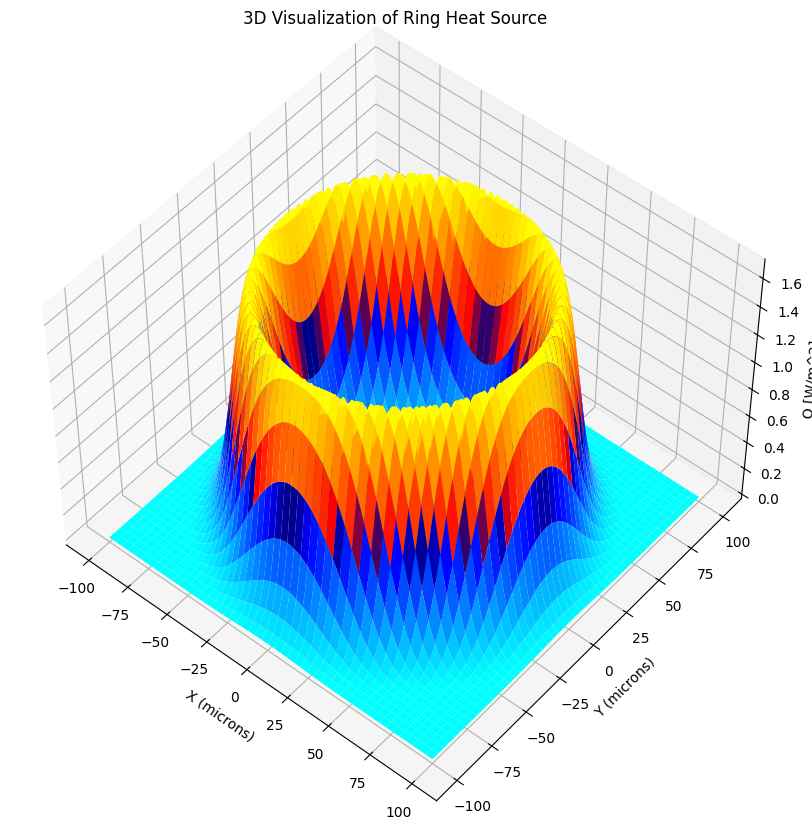

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import erfc

# Colormap options
cmaps = ['bwr', 'seismic', 'hsv', 'jet', 'coolwarm', 'viridis', 'plasma', 'cividis', 'inferno', 'magma', cold2hot, hot2cold]

# Generate grid
x = np.linspace(-100e-6, 100e-6, 1000)
y = np.linspace(-100e-6, 100e-6, 1000)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2)

def RingHS_3D(P, eta, r_R, r_T, A, Ca, Cb, Factor, i):
    rR, rT = r_R * 1.0e-6, r_T * 1.0e-6  # scaling unit to meter
    F = 1
    Y = np.exp(-rR**2 / (2 * (rT/2)**2)) + (rR / (rT/2)) * (np.pi / 2)**0.5 * erfc(-rR / ((rT/2) * 2**0.5))
    Q = F * ((Ca * A * P * eta) / (np.pi * rT**2 * Y)) * np.exp(-Cb * ((r - rR)**2 / (rT**2)))

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x*1e6, y*1e6, Q, cmap=cmaps[i], edgecolor='none')

    # Add circles in 3D
    # theta = np.linspace(0, 2 * np.pi, 1000)
    # for rC in [rR - rT/2, rR, rR + rT/2]:
    #     ax.plot(rC * np.cos(theta) * 1e6, rC * np.sin(theta) * 1e6, np.max(Q) * np.ones_like(theta), color='k', linestyle='-', linewidth=3)
    
    ax.set_xlabel('X (microns)')
    ax.set_ylabel('Y (microns)')
    ax.set_zlabel('Q [W/m^2]')
    ax.set_title('3D Visualization of Ring Heat Source')
    ax.view_init(elev=50, azim=-50)

    plt.show()

# Call the 3D function
RingHS_3D(P=250, eta=0.75, r_R=70, r_T=20, A=1, Ca=2.0, Cb=2.0, Factor=1e-4, i=10)


## 2D Top View

### Gaussian HS

In [4]:
cmaps = ['bwr', 'YlOrBr', 'seismic', 'hsv', 'jet', 'coolwarm', 'viridis', 'plasma', 'cividis', 'inferno', 'magma']
x = np.linspace(-80e-6, 80e-6, 1600)
y = np.linspace(-80e-6, 80e-6, 1600)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2)

extent = [-len(x)/2, len(x)/2, -len(y)/2, len(y)/2]

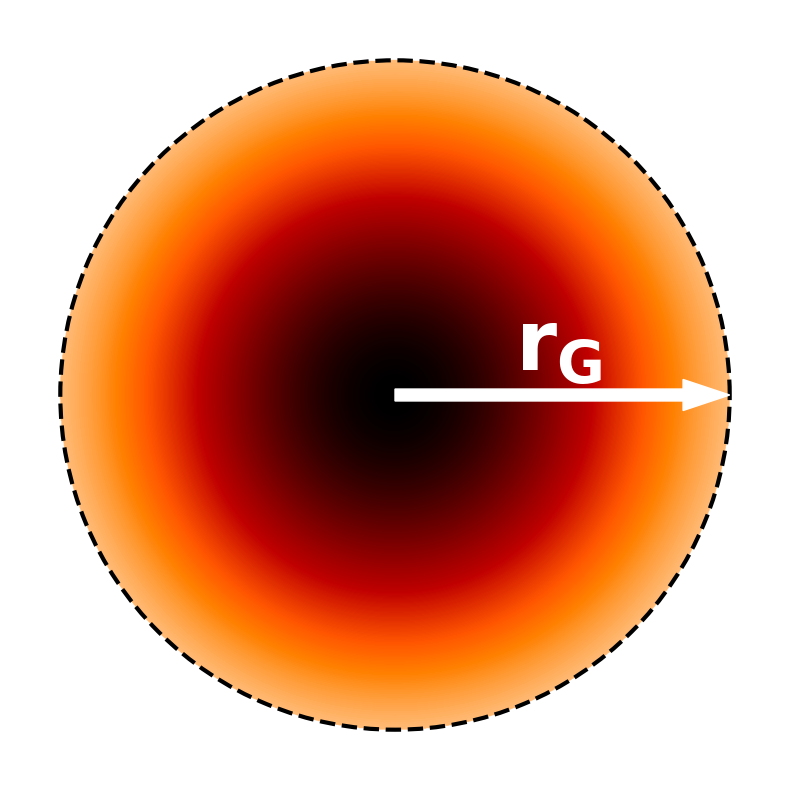

In [7]:
cmaps = ['gist_heat_r', 'plasma', ]

def GaussianHS(P, eta, r_G, A, Ca, Cb, Factor, i):
    rG = r_G*1.0e-6 # scaling unit to meter
    # sigma = rT/2
    F = np.where(rG>=r, 1, 0)
    Q = F * ((Ca * A * P * eta) / (np.pi * rG**2)) * np.exp(-Cb * ((r)**2 / (rG**2)))

    fig, ax1 = plt.subplots(1,1, figsize=(8,8), frameon=False)
    ax1.set_facecolor((0, 0, 0, 0))

    cmap = plt.get_cmap(f'{cmaps[i]}')
    cmap.set_under('white', alpha=0)
    hmap1 = ax1.imshow(Q, vmin=1, vmax=Q.max(), cmap=cmap, extent=extent, origin='upper')
    
    ax1.scatter(0, 0, color='k', s=500, marker ='.')
    ## ax2 = fig.add_axes([0.95, 0.11, 0.1, 0.77]) 
    # ax2 = fig.add_axes([1.03, 0.02, 0.1, 0.96]) ## For tight layout
    # ax2.tick_params(axis='both', labelcolor='black', labelsize=20, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    # cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    # cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    # cbar.set_label(r'$\mathbf{\longleftarrow}$   Q [W/m$\mathbf{^2}$]  $\mathbf{\longrightarrow}$', color='white',  labelpad=-120, fontsize=40, rotation=90, weight='bold')
    # cbar.set_ticks([np.max(Q)*0.01, (np.max(Q))/4, (np.max(Q))/2, (np.max(Q))*3/4, np.max(Q)*0.99], labels=[f'{np.min(Q)/1e10:.2f}',f'{(np.max(Q)/4)/1e10:.2f}',  f'{(np.max(Q)/2)/1e10:.2f}',f'{(np.max(Q)*3/4)/1e10:.2f}',  f'{np.max(Q)/1e10:.2f}'], weight='bold') 
    # cbar.ax.set_title(r'$\mathbf{\times 10 ^{10}}$', fontsize=30, color='k', weight='bold', pad=15)
    # ax2.spines[:].set_linewidth(4)
    
    circ_R = ax1.add_patch(patches.Arc((0, 0), 10*2*r_G, 10*2*r_G, angle=0.0, theta1=0.0, theta2=360, color='k', linestyle = '--', linewidth=3, fill=False))
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.annotate(r'r$\mathbf{_{G}}$', xy=(250, 50), rotation=0, fontsize = 60, weight = 'bold', color='white',)
    ax1.arrow(0, 0, 700, 0,  width = 25, color='white', length_includes_head=True, clip_on=False, head_width=65)

    ax1.axis('equal')
    ax1.spines[:].set_linewidth(0)
    
    plt.tight_layout()
    
    # plt.savefig('../../figures/GHS_Top.png',bbox_inches='tight', dpi=800)
    # plt.savefig('../../figures/jpg/GHS_Top.jpg',bbox_inches='tight')
    # plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/GHS_Top.png',bbox_inches='tight', dpi=800)
    # plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/GHS_Top.jpg',bbox_inches='tight')
    return Q
    plt.show()


Q_GHS = GaussianHS(P=250, eta=0.75, r_G=70, A=1, Ca=2.0, Cb=2.0, Factor=1e-4, i=0)
Qmax = Q_GHS.max()

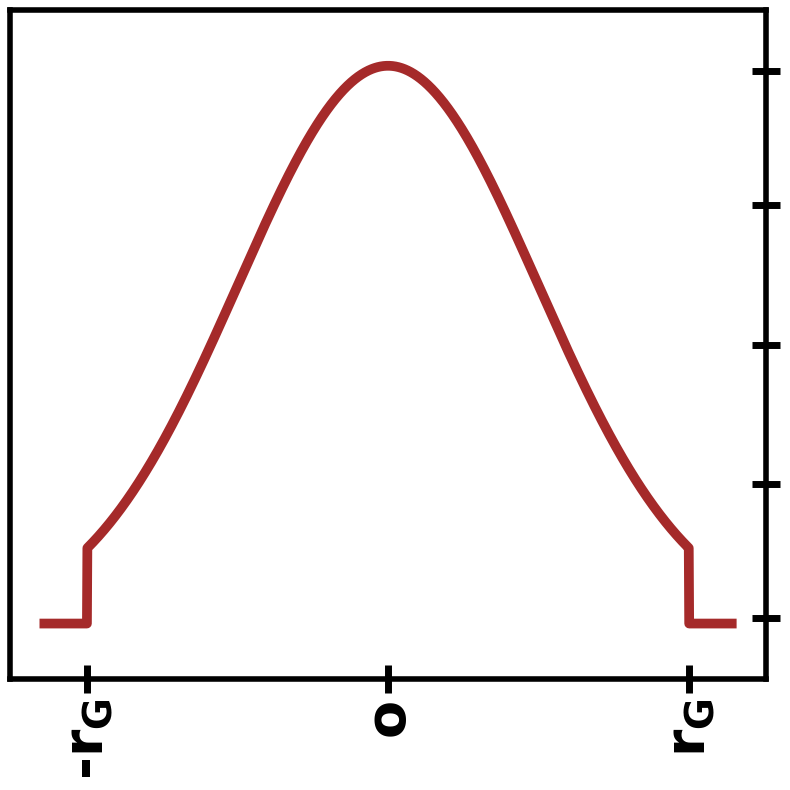

In [9]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

ax1.plot(Q_GHS[800,:], linewidth=7, linestyle='-', color='brown')
ax1.set_ylim(-0.1*Qmax, 1.1*Qmax)
ax1.tick_params(axis='both',  direction='inout', length=20, width=5, color='k', labelcolor='black', labelsize=65, bottom=True, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax1.set_yticks([np.max(Q_GHS)*0.01, (np.max(Q_GHS))/4, (np.max(Q_GHS))/2, (np.max(Q_GHS))*3/4, np.max(Q_GHS)*0.99],  labels=[f'',f'', f'',f'', f''], size=25, color='k', rotation=0,  weight='bold', )
ax1.set_xticks([800-700, 800, 800+700], labels=[r'-r$\mathbf{_{G}}$', r'o', r'r$\mathbf{_{G}}$', ], size=40, color='k', rotation=90, weight='bold')
ax1.yaxis.tick_right()
ax1.spines[:].set_linewidth(4)
plt.tight_layout()

# plt.savefig('../../figures/GHS_Side.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/GHS_Side.jpg',bbox_inches='tight')
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/GHS_Side.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/GHS_Side.jpg',bbox_inches='tight')

plt.show()

### Flattop HS

In [10]:
cmaps = ['bwr', 'YlOrBr', 'seismic', 'hsv', 'jet', 'coolwarm', 'viridis', 'plasma', 'cividis', 'inferno', 'magma']
x = np.linspace(-80e-6, 80e-6, 1600)
y = np.linspace(-80e-6, 80e-6, 1600)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2)

extent = [-len(x)/2, len(x)/2, -len(y)/2, len(y)/2]

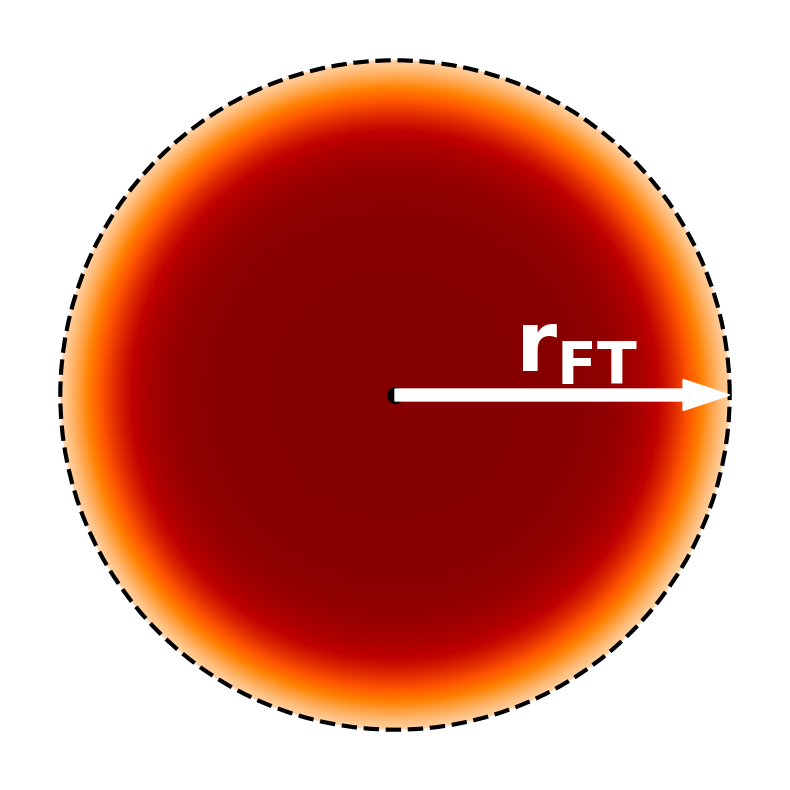

In [11]:
cmaps = ['gist_heat_r', 'plasma', ]

def FlatTopHS(P, eta, r_G, A, Ca, Cb, k, Factor, i):
    rG = r_G*1.0e-6 # scaling unit to meter
    # sigma = rT/2
    F = np.where(rG>=r, 1, 0)
    Q = F*((Ca**(1/k)*k*P*eta*A)/(np.pi*rG**2*math.gamma(1/k)))*(np.exp(-Cb*(r**2/rG**2)**k))

    fig, ax1 = plt.subplots(1,1, figsize=(8,8), frameon=False)
    ax1.set_facecolor((0, 0, 0, 0))

    cmap = plt.get_cmap(f'{cmaps[i]}')
    cmap.set_under('white', alpha=0)
    hmap1 = ax1.imshow(Q, vmin=1, vmax=Qmax, cmap=cmap, extent=extent, origin='upper')
    
    ax1.scatter(0, 0, color='k', s=500, marker ='.')
    
    # # ax2 = fig.add_axes([0.95, 0.11, 0.1, 0.77]) 
    # ax2 = fig.add_axes([1.03, 0.02, 0.1, 0.96]) ## For tight layout
    # ax2.tick_params(axis='both', labelcolor='black', labelsize=20, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    # cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    # cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    # cbar.set_label(r'$\mathbf{\longleftarrow}$   Q [W/m$\mathbf{^2}$]  $\mathbf{\longrightarrow}$', color='white',  labelpad=-120, fontsize=40, rotation=90, weight='bold')
    # cbar.set_ticks([np.max(Q_GHS)*0.01, (np.max(Q_GHS))/4, (np.max(Q_GHS))/2, (np.max(Q_GHS))*3/4, np.max(Q_GHS)*0.99], labels=[f'{np.min(Q_GHS)/1e10:.2f}',f'{(np.max(Q_GHS)/4)/1e10:.2f}',  f'{(np.max(Q_GHS)/2)/1e10:.2f}',f'{(np.max(Q_GHS)*3/4)/1e10:.2f}',  f'{np.max(Q_GHS)/1e10:.2f}'], weight='bold') 
    # cbar.ax.set_title(r'$\mathbf{\times 10 ^{10}}$', fontsize=30, color='k', weight='bold', pad=15)
    # ax2.spines[:].set_linewidth(4)
    
    circ_R = ax1.add_patch(patches.Arc((0, 0), 10*2*r_G, 10*2*r_G, angle=0.0, theta1=0.0, theta2=360, color='k', linestyle = '--', linewidth=3, fill=False))
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.annotate(r'r$\mathbf{_{FT}}$', xy=(250, 50), rotation=0, fontsize = 60, weight = 'bold', color='white',)
    ax1.arrow(0, 0, 700, 0,  width = 25, color='white', length_includes_head=True, clip_on=False, head_width=65)

    ax1.axis('equal')
    ax1.spines[:].set_linewidth(0)
    
    plt.tight_layout()
    # plt.savefig('../../figures/FTHS_Top.png',bbox_inches='tight', dpi=800)
    # plt.savefig('../../figures/jpg/FTHS_Top.jpg',bbox_inches='tight')
    # plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/FTHS_Top.png',bbox_inches='tight', dpi=800)
    # plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/FTHS_Top.jpg',bbox_inches='tight')
    return Q
    
    plt.show()


Q_FTHS = FlatTopHS(P=250, eta=0.75, r_G=70, A=1, Ca=2.0, Cb=2.0, k=4.2, Factor=1e-4, i=0)

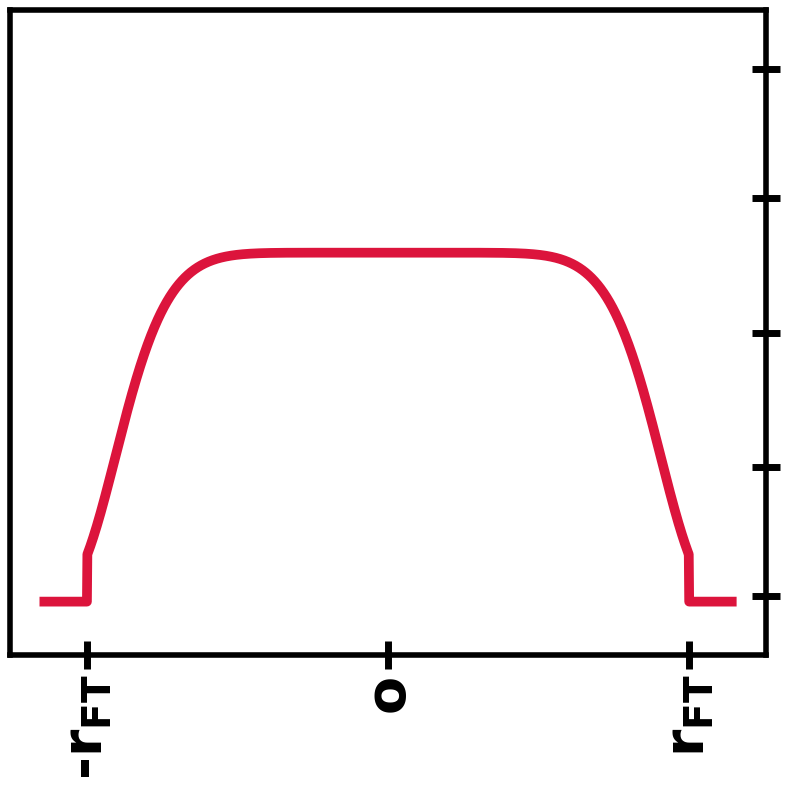

In [13]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

ax1.plot(Q_FTHS[800,:], linewidth=7, linestyle='-', color='crimson')
ax1.set_ylim(-0.1*Qmax, 1.1*Qmax)
ax1.tick_params(axis='both',  direction='inout', length=20, width=5, color='k', labelcolor='black', labelsize=65, bottom=True, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax1.set_yticks([np.max(Q_GHS)*0.01, (np.max(Q_GHS))/4, (np.max(Q_GHS))/2, (np.max(Q_GHS))*3/4, np.max(Q_GHS)*0.99],  labels=[f'',f'', f'',f'', f''], size=25, color='k', rotation=0,  weight='bold', )
ax1.set_xticks([800-700, 800, 800+700], labels=[r'-r$\mathbf{_{FT}}$', r'o', r'r$\mathbf{_{FT}}$', ], size=40, color='k', rotation=90, weight='bold')
ax1.yaxis.tick_right()
ax1.spines[:].set_linewidth(4)
plt.tight_layout()

# plt.savefig('../../figures/FTHS_Side.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/FTHS_Side.jpg',bbox_inches='tight')
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/FTHS_Side.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/FTHS_Side.jpg',bbox_inches='tight')
            
plt.show()

### Ring HS

In [14]:
cmaps = ['bwr', 'YlOrBr', 'seismic', 'hsv', 'jet', 'coolwarm', 'viridis', 'plasma', 'cividis', 'inferno', 'magma']
x = np.linspace(-80e-6, 80e-6, 1600)
y = np.linspace(-80e-6, 80e-6, 1600)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2)

extent = [-len(x)/2, len(x)/2, -len(y)/2, len(y)/2]

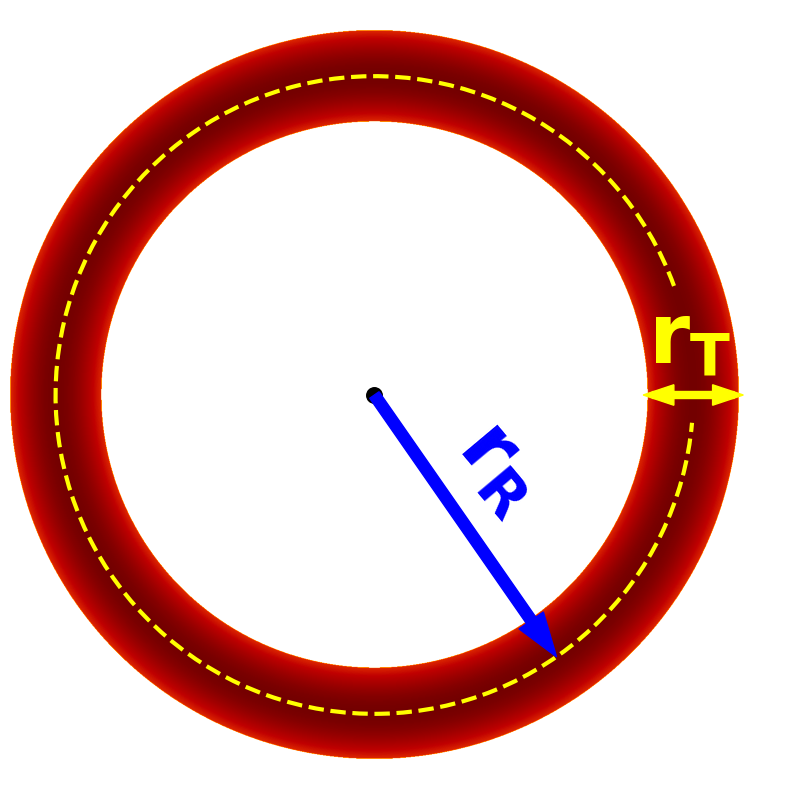

In [15]:
cmaps = ['gist_heat_r', 'plasma', ]

def RingHS(P, eta, r_R, r_T, A, Ca, Cb, Factor, i):
    rR, rT = r_R*1.0e-6, r_T*1.0e-6  # scaling unit to meter
    # sigma = rT/2
    F = np.where((rR-(rT/2)<=r) & (r<=rR+(rT/2)), 1, 0)
    Y = np.exp(-rR**2 / (2 * (rT/2)**2)) + (rR / (rT/2)) * (np.pi / 2)**0.5 * erfc(-rR / ((rT/2) * 2**0.5))
    Q = F * ((Ca * A * P * eta) / (np.pi * rT**2 * Y)) * np.exp(-Cb * ((r - rR)**2 / (rT**2)))

    fig, ax1 = plt.subplots(1,1, figsize=(8,8), frameon=False)
    ax1.set_facecolor((0, 0, 0, 0))

    cmap = plt.get_cmap(f'{cmaps[i]}')
    cmap.set_under('white', alpha=0)
    hmap1 = ax1.imshow(Q, vmin=1, vmax=Qmax, cmap=cmap, extent=extent, origin='upper')
    
    ax1.scatter(0, 0, color='k', s=500, marker ='.')

    # # ax2 = fig.add_axes([0.95, 0.11, 0.1, 0.77]) 
    # ax2 = fig.add_axes([1.03, 0.02, 0.1, 0.96]) ## For tight layout
    # ax2.tick_params(axis='both', labelcolor='black', labelsize=20, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    # cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    # cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    # cbar.set_label(r'$\mathbf{\longleftarrow}$   Q [W/m$\mathbf{^2}$]  $\mathbf{\longrightarrow}$', color='white',  labelpad=-120, fontsize=40, rotation=90, weight='bold')
    # ## cbar.set_ticks([np.max(Q)*0.01, (np.max(Q))/4, (np.max(Q))/2, (np.max(Q))*3/4, np.max(Q)*0.99], labels=[f'{np.min(Q)/1e10:.2f}',f'{(np.max(Q)/4)/1e10:.2f}',  f'{(np.max(Q)/2)/1e10:.2f}',f'{(np.max(Q)*3/4)/1e10:.2f}',  f'{np.max(Q)/1e10:.2f}'], weight='bold') 
    # cbar.set_ticks([np.max(Q_GHS)*0.01, (np.max(Q_GHS))/4, (np.max(Q_GHS))/2, (np.max(Q_GHS))*3/4, np.max(Q_GHS)*0.99], labels=[f'{np.min(Q_GHS)/1e10:.2f}',f'{(np.max(Q_GHS)/4)/1e10:.2f}',  f'{(np.max(Q_GHS)/2)/1e10:.2f}',f'{(np.max(Q_GHS)*3/4)/1e10:.2f}',  f'{np.max(Q_GHS)/1e10:.2f}'], weight='bold') 
    # cbar.ax.set_title(r'$\mathbf{\times 10 ^{10}}$', fontsize=30, color='k', weight='bold', pad=15)
    # ax2.spines[:].set_linewidth(4)
    
    circ_R = ax1.add_patch(patches.Arc((0, 0), 10*2*r_R, 10*2*r_R, angle=20.0, theta1=0.0, theta2=335, color='yellow', linestyle = '--', linewidth=3, fill=False))
    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.annotate(r'r$\mathbf{_{R}}$', xy=(150, -250), rotation=-50, fontsize = 60, weight = 'bold', color='blue',)
    ax1.annotate(r'r$\mathbf{_{T}}$', xy=(600, 70), rotation=0, fontsize = 60, weight = 'bold', color='yellow')

    ax1.arrow(0, 0, 400, -575,  width = 25, color='blue', length_includes_head=True, clip_on=False, head_width=65)
    ax1.arrow(610, 0, 200, 0,  width = 15, color='yellow', length_includes_head=True, clip_on=False, head_width=45)
    ax1.arrow(790, 0, -200, 0,  width = 15, color='yellow', length_includes_head=True, clip_on=False, head_width=45)

    ax1.axis('equal')
    ax1.spines[:].set_linewidth(0)
    # ax1.grid()
    

    plt.tight_layout()
    # plt.savefig('../../figures/RHS_Top.png',bbox_inches='tight', dpi=800)
    # plt.savefig('../../figures/jpg/RHS_Top.jpg',bbox_inches='tight')
    # plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/RHS_Top.png',bbox_inches='tight', dpi=800)
    # plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/RHS_Top.jpg',bbox_inches='tight')
    return Q
    plt.show()


Q_RHS = RingHS(P=250, eta=0.75, r_R=70, r_T=20, A=1, Ca=2.0, Cb=2.0, Factor=1e-4, i=0)

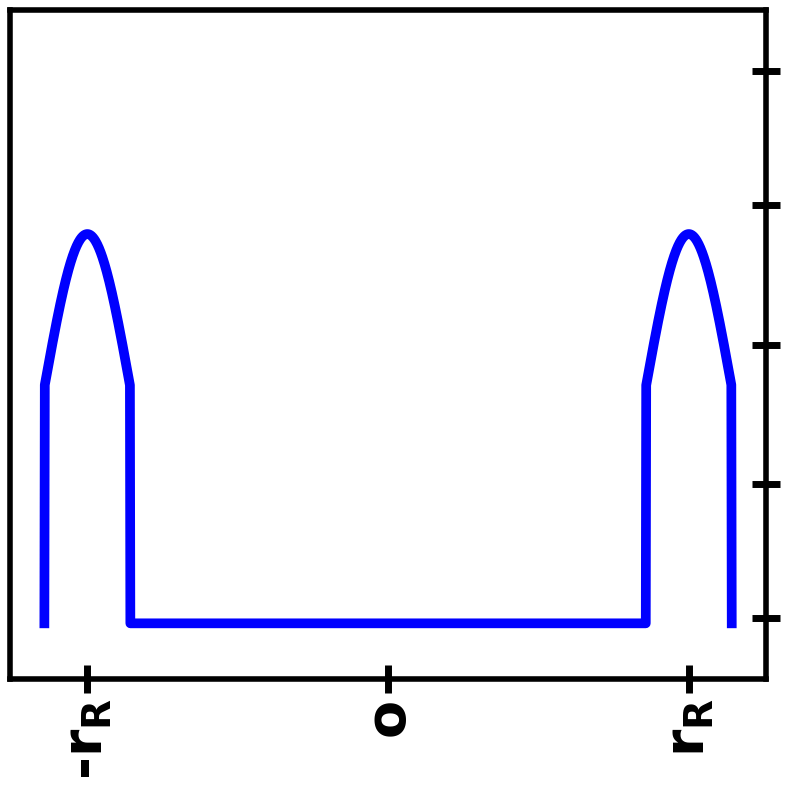

In [17]:
fig, ax1 = plt.subplots(1,1, figsize=(8,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

ax1.plot(Q_RHS[800,:], linewidth=7, linestyle='-', color='blue')
ax1.set_ylim(-0.1*Qmax, 1.1*Qmax)
ax1.tick_params(axis='both',  direction='inout', length=20, width=5, color='k', labelcolor='black', labelsize=65, bottom=True, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax1.set_yticks([np.max(Q_GHS)*0.01, (np.max(Q_GHS))/4, (np.max(Q_GHS))/2, (np.max(Q_GHS))*3/4, np.max(Q_GHS)*0.99],  labels=[f'',f'', f'',f'', f''], size=25, color='k', rotation=0,  weight='bold', )
ax1.set_xticks([800-700, 800, 800+700], labels=[r'-r$\mathbf{_{R}}$', r'o', r'r$\mathbf{_{R}}$', ], size=40, color='k', rotation=90, weight='bold')
ax1.yaxis.tick_right()
ax1.spines[:].set_linewidth(4)
plt.tight_layout()

# plt.savefig('../../figures/RHS_Side.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/RHS_Side.jpg',bbox_inches='tight')
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/RHS_Side.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/RHS_Side.jpg',bbox_inches='tight')
            
plt.show()

### BesselHS

In [18]:
cmaps = ['bwr', 'YlOrBr', 'seismic', 'hsv', 'jet', 'coolwarm', 'viridis', 'plasma', 'cividis', 'inferno', 'magma']
x = np.linspace(-80e-6, 80e-6, 1600)
y = np.linspace(-80e-6, 80e-6, 1600)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2)

extent = [-len(x)/2, len(x)/2, -len(y)/2, len(y)/2]

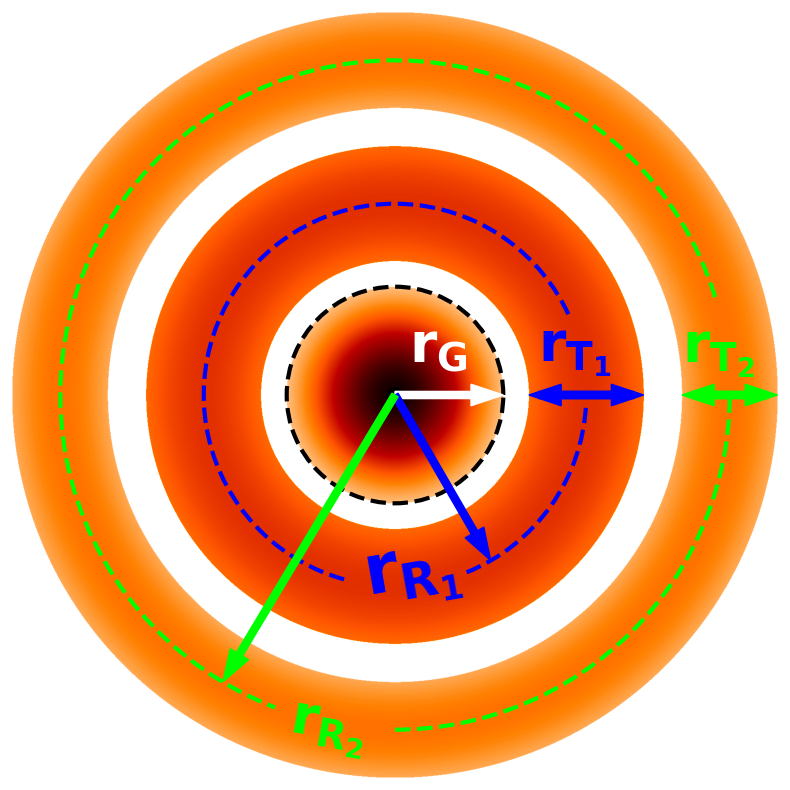

In [19]:
cmaps = ['gist_heat_r', 'plasma', ]

def BesselHS(P, a0, a1, a2, eta, r_G, r_R1, r_T1, r_R2, r_T2, A, Ca, Cb, Factor, i):
    rG, rR1, rT1, rR2, rT2 = r_G*1.0e-6, r_R1*1.0e-6, r_T1*1.0e-6, r_R2*1.0e-6, r_T2*1.0e-6  # scaling unit to meter
    # sigma = rT/2
    RF1 = 3.0e-6
    F0 = np.where(rG>r, 1, 0)
    F1 = np.where((rR1-(rT1/2)+RF1<=r) & (r<=rR1+(rT1/2)-RF1), 1, 0)
    F2 = np.where((rR2-(rT2/2)<=r) & (r<=rR2+(rT2/2)), 1, 0)

    Y1 = np.exp(-rR1**2 / (2 * (rT1/2)**2)) + (rR1 / (rT1/2)) * (np.pi / 2)**0.5 * erfc(-rR1 / ((rT1/2) * 2**0.5))
    Y2 = np.exp(-rR2**2 / (2 * (rT2/2)**2)) + (rR2 / (rT2/2)) * (np.pi / 2)**0.5 * erfc(-rR2 / ((rT2/2) * 2**0.5))
    Q_G  = F0 * ((Ca * A * P * a0 * eta) / (np.pi * rG**2)) * np.exp(-Cb * ((r)**2 / (rG**2)))
    Q_R1 = F1 * ((Ca * A * P * a1 * eta) / (np.pi * rT1**2 * Y1)) * np.exp(-Cb * ((r - rR1)**2 / (rT1**2)))
    Q_R2 = F2 * ((Ca * A * P * a2 * eta) / (np.pi * rT2**2 * Y2)) * np.exp(-Cb * ((r - rR2)**2 / (rT2**2)))
    Q = Q_G + Q_R1 + Q_R2


    fig, ax1 = plt.subplots(1,1, figsize=(8,8), frameon=False)
    ax1.set_facecolor((0, 0, 0, 0))

    cmap = plt.get_cmap(f'{cmaps[i]}')
    cmap.set_under('white', alpha=0)
    hmap1 = ax1.imshow(Q, vmin=1, vmax=Qmax, cmap=cmap, extent=extent, origin='upper')
    
    ax1.scatter(0, 0, color='k', s=500, marker ='.')

    # # ax2 = fig.add_axes([0.95, 0.11, 0.1, 0.77]) 
    # ax2 = fig.add_axes([1.03, 0.02, 0.1, 0.96]) ## For tight layout
    # ax2.tick_params(axis='both', labelcolor='black', labelsize=20, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    # cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
    # cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
    # cbar.set_label(r'$\mathbf{\longleftarrow}$   Q [W/m$\mathbf{^2}$]  $\mathbf{\longrightarrow}$', color='white',  labelpad=-120, fontsize=40, rotation=90, weight='bold')
    # cbar.set_ticks([np.max(Q_GHS)*0.01, (np.max(Q_GHS))/4, (np.max(Q_GHS))/2, (np.max(Q_GHS))*3/4, np.max(Q_GHS)*0.99], labels=[f'{np.min(Q_GHS)/1e10:.2f}',f'{(np.max(Q_GHS)/4)/1e10:.2f}',  f'{(np.max(Q_GHS)/2)/1e10:.2f}',f'{(np.max(Q_GHS)*3/4)/1e10:.2f}',  f'{np.max(Q_GHS)/1e10:.2f}'], weight='bold') 
    # cbar.ax.set_title(r'$\mathbf{\times 10 ^{10}}$', fontsize=30, color='k', weight='bold', pad=15)
    # ax2.spines[:].set_linewidth(4)

    circ_G = ax1.add_patch(patches.Arc((0, 0), 10*2*r_G, 10*2*r_G, angle=0, theta1=0.0, theta2=360, color='k', linestyle = '--', linewidth=3, fill=False))  
    circ_R1a = ax1.add_patch(patches.Arc((0, 0), 10*2*r_R1, 10*2*r_R1, angle=25.0, theta1=0.0, theta2=230, color='blue', linestyle = '--', linewidth=3, fill=False))
    circ_R1b = ax1.add_patch(patches.Arc((0, 0), 10*2*r_R1, 10*2*r_R1, angle=292.0, theta1=0.0, theta2=65, color='blue', linestyle = '--', linewidth=3, fill=False))
    circ_R2a = ax1.add_patch(patches.Arc((0, 0), 10*2*r_R2, 10*2*r_R2, angle=17.0, theta1=0.0, theta2=232, color='lime', linestyle = '--', linewidth=3, fill=False))
    circ_R2b = ax1.add_patch(patches.Arc((0, 0), 10*2*r_R2, 10*2*r_R2, angle=270.0, theta1=0.0, theta2=90, color='lime', linestyle = '--', linewidth=3, fill=False))

    ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax1.annotate(r'r$\mathbf{_G}$', xy=(30, 70), rotation=0, fontsize = 40, weight = 'bold', color='white')
    ax1.annotate(r'r$\mathbf{_{R_1}}$', xy=(-75, -420), rotation=10, fontsize = 50, weight = 'bold', color='blue',)
    ax1.annotate(r'r$\mathbf{_{T_1}}$', xy=(300, 70), rotation=0, fontsize = 40, weight = 'bold', color='blue')
    ax1.annotate(r'r$\mathbf{_{R_2}}$', xy=(-230, -730), rotation=-10, fontsize = 40, weight = 'bold', color='lime')
    ax1.annotate(r'r$\mathbf{_{T_2}}$', xy=(600, 70), rotation=0, fontsize = 40, weight = 'bold', color='lime')

    ax1.arrow(0, 0, 10*r_G, 0,  width = 15, color='white', length_includes_head=True, clip_on=False, head_width=45)
    ax1.arrow(0, 0, 200, -346,  width = 15, color='blue', length_includes_head=True, clip_on=False, head_width=45)
    ax1.arrow(0, 0, -360, -600,  width = 15, color='lime', length_includes_head=True, clip_on=False, head_width=45)

    ax1.arrow(300, 0, 220, 0,  width = 15, color='blue', length_includes_head=True, clip_on=False, head_width=45)
    ax1.arrow(500, 0, -220, 0,  width = 15, color='blue', length_includes_head=True, clip_on=False, head_width=45)

    ax1.arrow(620, 0, 180, 0,  width = 15, color='lime', length_includes_head=True, clip_on=False, head_width=45)
    ax1.arrow(780, 0, -180, 0,  width = 15, color='lime', length_includes_head=True, clip_on=False, head_width=45)

    ax1.axis('equal')
    ax1.spines[:].set_linewidth(0)
    # ax1.grid()

    plt.tight_layout()
    
    # plt.savefig('../../figures/BHS_Top.png',bbox_inches='tight', dpi=800)
    # plt.savefig('../../figures/jpg/BHS_Top.jpg',bbox_inches='tight')
    # plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/BHS_Top.png',bbox_inches='tight', dpi=800)
    # plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/BHS_Top.jpg',bbox_inches='tight')
    
    return Q, Q_G, Q_R1, Q_R2
    plt.show()


Q_BHS = BesselHS(P=250, a0=0.1, a1=0.5, a2=0.4, eta=0.75, r_G=22.65, r_R1=40, r_T1=30, r_R2=70, r_T2=20, A=1, Ca=2.0, Cb=2.0, Factor=1e-4, i=0) # a0 = 0.1, a1 = 0.5, a2 = 0.4 # Actually

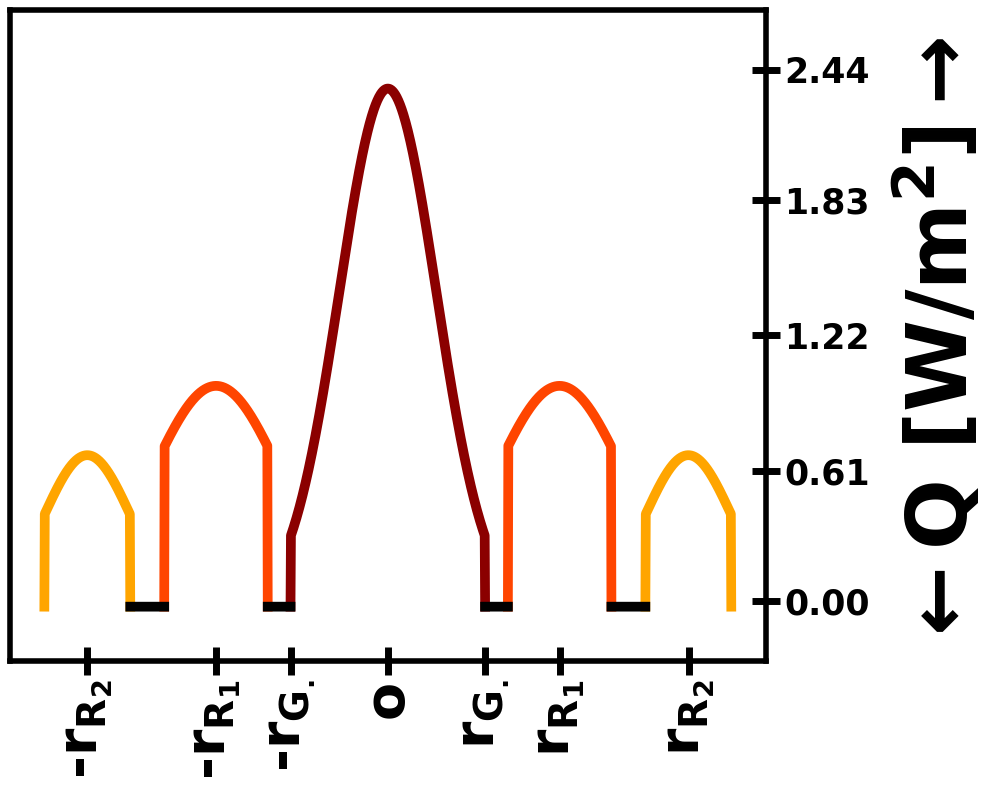

In [21]:
def zero_remover(array):
    # Create a boolean mask where the condition is true if an element is 0 and is adjacent to a non-zero element
    mask = (array == 0) & ((np.roll(array, 1) != 0) | (np.roll(array, -1) != 0))
    array[mask] = 1
    array[array == 0] = np.nan
    return array
    
fig, ax1 = plt.subplots(1,1, figsize=(8.9,8), frameon=False)
ax1.set_facecolor((0, 0, 0, 0))

Q_B = Q_BHS[0]
Q_G0, Q_R1, Q_R2 = zero_remover(Q_BHS[1]), zero_remover(Q_BHS[2]), zero_remover(Q_BHS[3]) 
Q_B[Q_B != 0] = np.nan
ax1.plot(Q_G0[800,:], linewidth=7, linestyle='-', color='darkred')
ax1.plot(Q_R1[800,:], linewidth=7, linestyle='-', color='orangered')
ax1.plot(Q_R2[800,:], linewidth=7, linestyle='-', color='orange')
ax1.plot(Q_B[800,:], linewidth=7, linestyle='-', color='k')

ax1.set_ylim(-0.1*Qmax, 1.1*Qmax)
ax1.tick_params(axis='both',  direction='inout', length=20, width=5, color='k', labelcolor='black', labelsize=65, bottom=True, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax1.set_yticks([np.max(Q_GHS)*0.01, (np.max(Q_GHS))/4, (np.max(Q_GHS))/2, (np.max(Q_GHS))*3/4, np.max(Q_GHS)*0.99],  labels=[f'{np.min(Q_GHS)/1e10:.2f}',f'{(np.max(Q_GHS)/4)/1e10:.2f}',  f'{(np.max(Q_GHS)/2)/1e10:.2f}',f'{(np.max(Q_GHS)*3/4)/1e10:.2f}',  f'{np.max(Q_GHS)/1e10:.2f}'], size=25, color='k', rotation=0,  weight='bold', )
ax1.set_xticks([800-700, 800-400, 800-226, 800, 800+226, 800+400, 800+700], labels=[r'-r$\mathbf{_{R_2}}$', r'-r$\mathbf{_{R_1}}$', r'-r$\mathbf{_{G_.}}$', 'o', r'r$\mathbf{_{G_.}}$', r'r$\mathbf{_{R_1}}$', r'r$\mathbf{_{R_2}}$', ], size=40, color='k', rotation=90, weight='bold')
text = Text(x=1.01, y=0.2, text=r'$\mathbf{\leftarrow}$Q [W/m$\mathbf{^2}$]$\mathbf{\rightarrow}$', fontsize=60, color='k', rotation=90, weight='bold')
fig.add_artist(text)
ax1.yaxis.tick_right()
ax1.spines[:].set_linewidth(4)
plt.tight_layout()

# plt.savefig('../../figures/BHS_Side.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/BHS_Side.jpg',bbox_inches='tight')
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/BHS_Side.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/BHS_Side.jpg',bbox_inches='tight')
            
plt.show()

### All in One

In [22]:
cmaps = ['gist_heat_r', 'plasma', ]
x = np.linspace(-80e-6, 80e-6, 1600)
y = np.linspace(-80e-6, 80e-6, 1600)
x, y = np.meshgrid(x, y)
r = np.sqrt(x**2 + y**2)
extent = [-len(x)/2, len(x)/2, -len(y)/2, len(y)/2]

P     = 250
a0    = 0.1
a1    = 0.5 # 0.5
a2    = 0.4 # 0.4
eta   = 0.75
r_G   = 70.0
r_R   = 70.0
r_T   = 20.0
r_BG  = 22.65
r_R1  = 40.0
r_T1  = 30.0
r_R2  = 70.0
r_T2  = 20.0
k     = 4.2
A     = 1
Ca    = 2.0
Cb    = 2.0
i     = 0
rG, rR, rT, rBG, rR1, rT1, rR2, rT2 = r_G*1.0e-6, r_R*1.0e-6, r_T*1.0e-6, r_BG*1.0e-6, r_R1*1.0e-6, r_T1*1.0e-6, r_R2*1.0e-6, r_T2*1.0e-6, # scaling unit to meter

FG    = np.where(rG>=r, 1, 0)
FT    = np.where(rG>=r, 1, 0)
FR    = np.where((rR-(rT/2)<=r) & (r<=rR+(rT/2)), 1, 0)
RF1   = 3.0e-6
F0    = np.where(rBG>r, 1, 0)
F1    = np.where((rR1-(rT1/2)+RF1<=r) & (r<=rR1+(rT1/2)-RF1), 1, 0)
F2    = np.where((rR2-(rT2/2)<=r) & (r<=rR2+(rT2/2)), 1, 0)

#### Only Top View

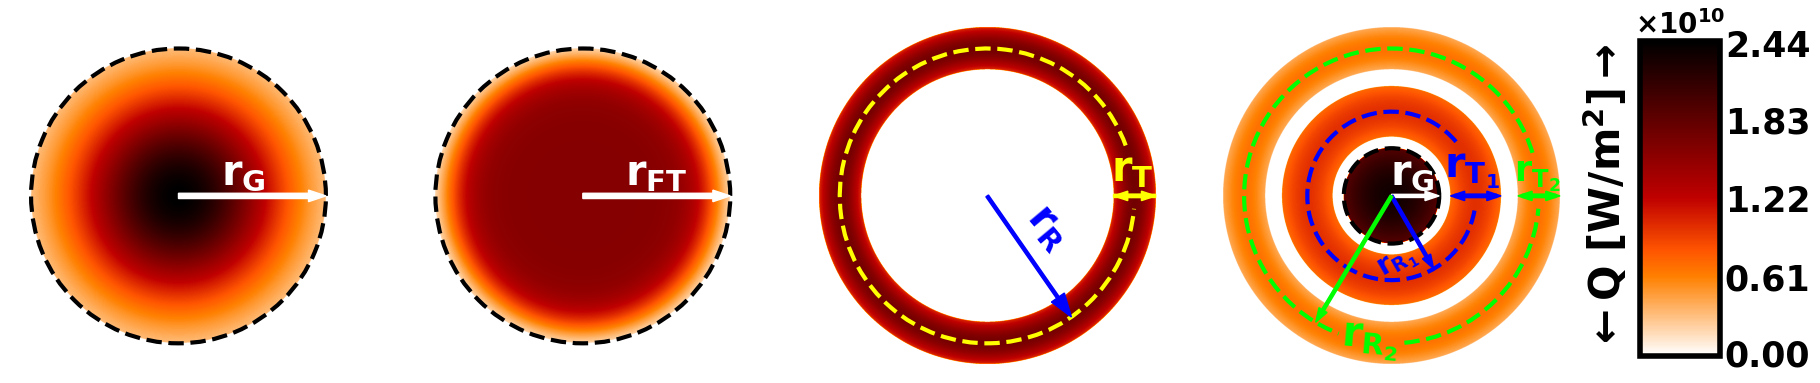

In [28]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(20,4.5), frameon=False)
[ax.set_facecolor((0, 0, 0, 0)) for ax in [ax1, ax2, ax3, ax4]]

########### Gaussian ######
Q_G = FG * ((Ca * A * P * eta) / (np.pi * rG**2)) * np.exp(-Cb * ((r)**2 / (rG**2)))
hmap1 = ax1.imshow(Q_G, vmin=1, vmax=Q_G.max(), cmap=cmaps[i], extent=extent, origin='upper')
circ_G = ax1.add_patch(patches.Arc((0, 0), 10*2*r_G, 10*2*r_G, angle=0.0, theta1=0.0, theta2=360, color='k', linestyle = '--', linewidth=3, fill=False))
ax1.scatter(0, 0, color='k', s=500, marker ='.')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.annotate(r'r$\mathbf{_{G}}$', xy=(200, 50), rotation=0, fontsize = 30, weight = 'bold', color='white',)
ax1.arrow(0, 0, 700, 0,  width = 25, color='white', length_includes_head=True, clip_on=False, head_width=55)
ax1.axis('equal')

# ############ Flat Top #####

Q_FT = FT*((Ca**(1/k)*k*P*eta*A)/(np.pi*rG**2*math.gamma(1/k)))*(np.exp(-Cb*(r**2/rG**2)**k))
hmap2 = ax2.imshow(Q_FT, vmin=1, vmax=Q_G.max(), cmap=cmaps[i], extent=extent, origin='upper')
circ_FT = ax2.add_patch(patches.Arc((0, 0), 10*2*r_G, 10*2*r_G, angle=0.0, theta1=0.0, theta2=360, color='k', linestyle = '--', linewidth=3, fill=False))
# ax2.scatter(0, 0, color='k', s=100, marker ='.')
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.annotate(r'r$\mathbf{_{FT}}$', xy=(200, 50), rotation=0, fontsize = 30, weight = 'bold', color='white',)
ax2.arrow(0, 0, 700, 0,  width = 25, color='white', length_includes_head=True, clip_on=False, head_width=55)
ax2.axis('equal')


# ########## Ring ########
Y = np.exp(-rR**2 / (2 * (rT/2)**2)) + (rR / (rT/2)) * (np.pi / 2)**0.5 * erfc(-rR / ((rT/2) * 2**0.5))
Q_R = FR * ((Ca * A * P * eta) / (np.pi * rT**2 * Y)) * np.exp(-Cb * ((r - rR)**2 / (rT**2)))

hmap2 = ax3.imshow(Q_R, vmin=1, vmax=Q_G.max(), cmap=cmaps[i], extent=extent, origin='upper')
circ_R = ax3.add_patch(patches.Arc((0, 0), 10*2*r_R, 10*2*r_R, angle=20.0, theta1=0.0, theta2=335, color='yellow', linestyle = '--', linewidth=3, fill=False))
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax3.annotate(r'r$\mathbf{_{R}}$', xy=(150, -250), rotation=-50, fontsize = 30, weight = 'bold', color='blue',)
ax3.annotate(r'r$\mathbf{_{T}}$', xy=(590, 70), rotation=0, fontsize = 30, weight = 'bold', color='yellow')
ax3.arrow(0, 0, 400, -575,  width = 15, color='blue', length_includes_head=True, clip_on=False, head_width=75)
ax3.arrow(600, 0, 200, 0,  width = 15, color='yellow', length_includes_head=True, clip_on=False, head_width=45)
ax3.arrow(800, 0, -200, 0,  width = 15, color='yellow', length_includes_head=True, clip_on=False, head_width=45)
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# ############# Bessel ########
Y1 = np.exp(-rR1**2 / (2 * (rT1/2)**2)) + (rR1 / (rT1/2)) * (np.pi / 2)**0.5 * erfc(-rR1 / ((rT1/2) * 2**0.5))
Y2 = np.exp(-rR2**2 / (2 * (rT2/2)**2)) + (rR2 / (rT2/2)) * (np.pi / 2)**0.5 * erfc(-rR2 / ((rT2/2) * 2**0.5))
Q_G0  = F0 * ((Ca * A * P * a0 * eta) / (np.pi * rBG**2)) * np.exp(-Cb * ((r)**2 / (rG**2)))
Q_R1 = F1 * ((Ca * A * P * a1 * eta) / (np.pi * rT1**2 * Y1)) * np.exp(-Cb * ((r - rR1)**2 / (rT1**2)))
Q_R2 = F2 * ((Ca * A * P * a2 * eta) / (np.pi * rT2**2 * Y2)) * np.exp(-Cb * ((r - rR2)**2 / (rT2**2)))
Q_B = Q_G0 + Q_R1 + Q_R2
hmap3 = ax4.imshow(Q_B, vmin=1, vmax=Q_G.max(), cmap=cmaps[i], extent=extent, origin='upper')
circ_G = ax4.add_patch(patches.Arc((0, 0), 10*2*r_BG, 10*2*r_BG, angle=0, theta1=0.0, theta2=360, color='k', linestyle = '--', linewidth=3, fill=False))  
circ_R1 = ax4.add_patch(patches.Arc((0, 0), 10*2*r_R1, 10*2*r_R1, angle=40.0, theta1=0.0, theta2=310, color='blue', linestyle = '--', linewidth=3, fill=False))
circ_R2a = ax4.add_patch(patches.Arc((0, 0), 10*2*r_R2, 10*2*r_R2, angle=17.0, theta1=0.0, theta2=232, color='lime', linestyle = '--', linewidth=3, fill=False))
circ_R2b = ax4.add_patch(patches.Arc((0, 0), 10*2*r_R2, 10*2*r_R2, angle=275.0, theta1=0.0, theta2=80, color='lime', linestyle = '--', linewidth=3, fill=False))
ax4.annotate(r'r$\mathbf{_G}$', xy=(-5, 50), rotation=0, fontsize = 30, weight = 'bold', color='white')
ax4.annotate(r'r$\mathbf{_{R_1}}$', xy=(-85, -380), rotation=30, fontsize = 20, weight = 'bold', color='blue',)
ax4.annotate(r'r$\mathbf{_{T_1}}$', xy=(250, 90), rotation=0, fontsize = 30, weight = 'bold', color='blue')
ax4.annotate(r'r$\mathbf{_{R_2}}$', xy=(-250, -730), rotation=-5, fontsize = 30, weight = 'bold', color='lime')
ax4.annotate(r'r$\mathbf{_{T_2}}$', xy=(580, 70), rotation=0, fontsize = 25, weight = 'bold', color='lime')
ax4.arrow(0, 0, 10*r_BG, 0,  width = 15, color='white', length_includes_head=True, clip_on=False, head_width=45)
ax4.arrow(0, 0, 200, -346,  width = 15, color='blue', length_includes_head=True, clip_on=False, head_width=45)
ax4.arrow(0, 0, -360, -600,  width = 15, color='lime', length_includes_head=True, clip_on=False, head_width=45)
ax4.arrow(300, 0, 220, 0,  width = 15, color='blue', length_includes_head=True, clip_on=False, head_width=45)
ax4.arrow(500, 0, -220, 0,  width = 15, color='blue', length_includes_head=True, clip_on=False, head_width=45)
ax4.arrow(620, 0, 180, 0,  width = 15, color='lime', length_includes_head=True, clip_on=False, head_width=45)
ax4.arrow(780, 0, -180, 0,  width = 15, color='lime', length_includes_head=True, clip_on=False, head_width=45)
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)


######### Color Bar
ax9 = fig.add_axes([0.94, 0.14, 0.04, 0.7]) 
# ax9 = fig.add_axes([1.02, 0.14, 0.04, 0.7]) ## With tight Layout
ax9.tick_params(axis='both', labelcolor='black', labelsize=20, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax9, orientation='vertical')
cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
cbar.set_label(r'$\mathbf{\leftarrow}$Q [W/m$\mathbf{^2}$]$\mathbf{\rightarrow}$', color='k',  labelpad=-165, fontsize=30, rotation=90, weight='bold')
cbar.set_ticks([np.max(Q_G)*0.01, (np.max(Q_G))/4, (np.max(Q_G))/2, (np.max(Q_G))*3/4, np.max(Q_G)*0.99], labels=[f'{np.min(Q_G)/1e10:.2f}',f'{(np.max(Q_G)/4)/1e10:.2f}',  f'{(np.max(Q_G)/2)/1e10:.2f}',f'{(np.max(Q_G)*3/4)/1e10:.2f}',  f'{np.max(Q_G)/1e10:.2f}'], weight='bold') 
cbar.ax.set_title(r'$\mathbf{\times 10 ^{10}}$', fontsize=20, color='k', weight='bold', pad=5)
ax9.spines[:].set_linewidth(4)

# ax1.set_title("GaussianHS", fontsize=40, color='k', weight='bold', pad=-400)
# ax2.set_title("RingHS", fontsize=40, color='k', weight='bold', pad=-400)
# ax3.set_title("FlatTopHS", fontsize=40, color='k', weight='bold', pad=-400)
# ax4.set_title("BesselHS", fontsize=40, color='k', weight='bold', pad=-400)

ax1.spines[:].set_linewidth(0)
ax2.spines[:].set_linewidth(0)
ax3.spines[:].set_linewidth(0)
ax4.spines[:].set_linewidth(0)

# plt.tight_layout()
    
# plt.savefig('../../figures/laser_beams_2D.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/laser_beams_2D.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/laser_beams_2D.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/laser_beams_2D.jpg',bbox_inches='tight',)

plt.show()


#### Both Top and Front View

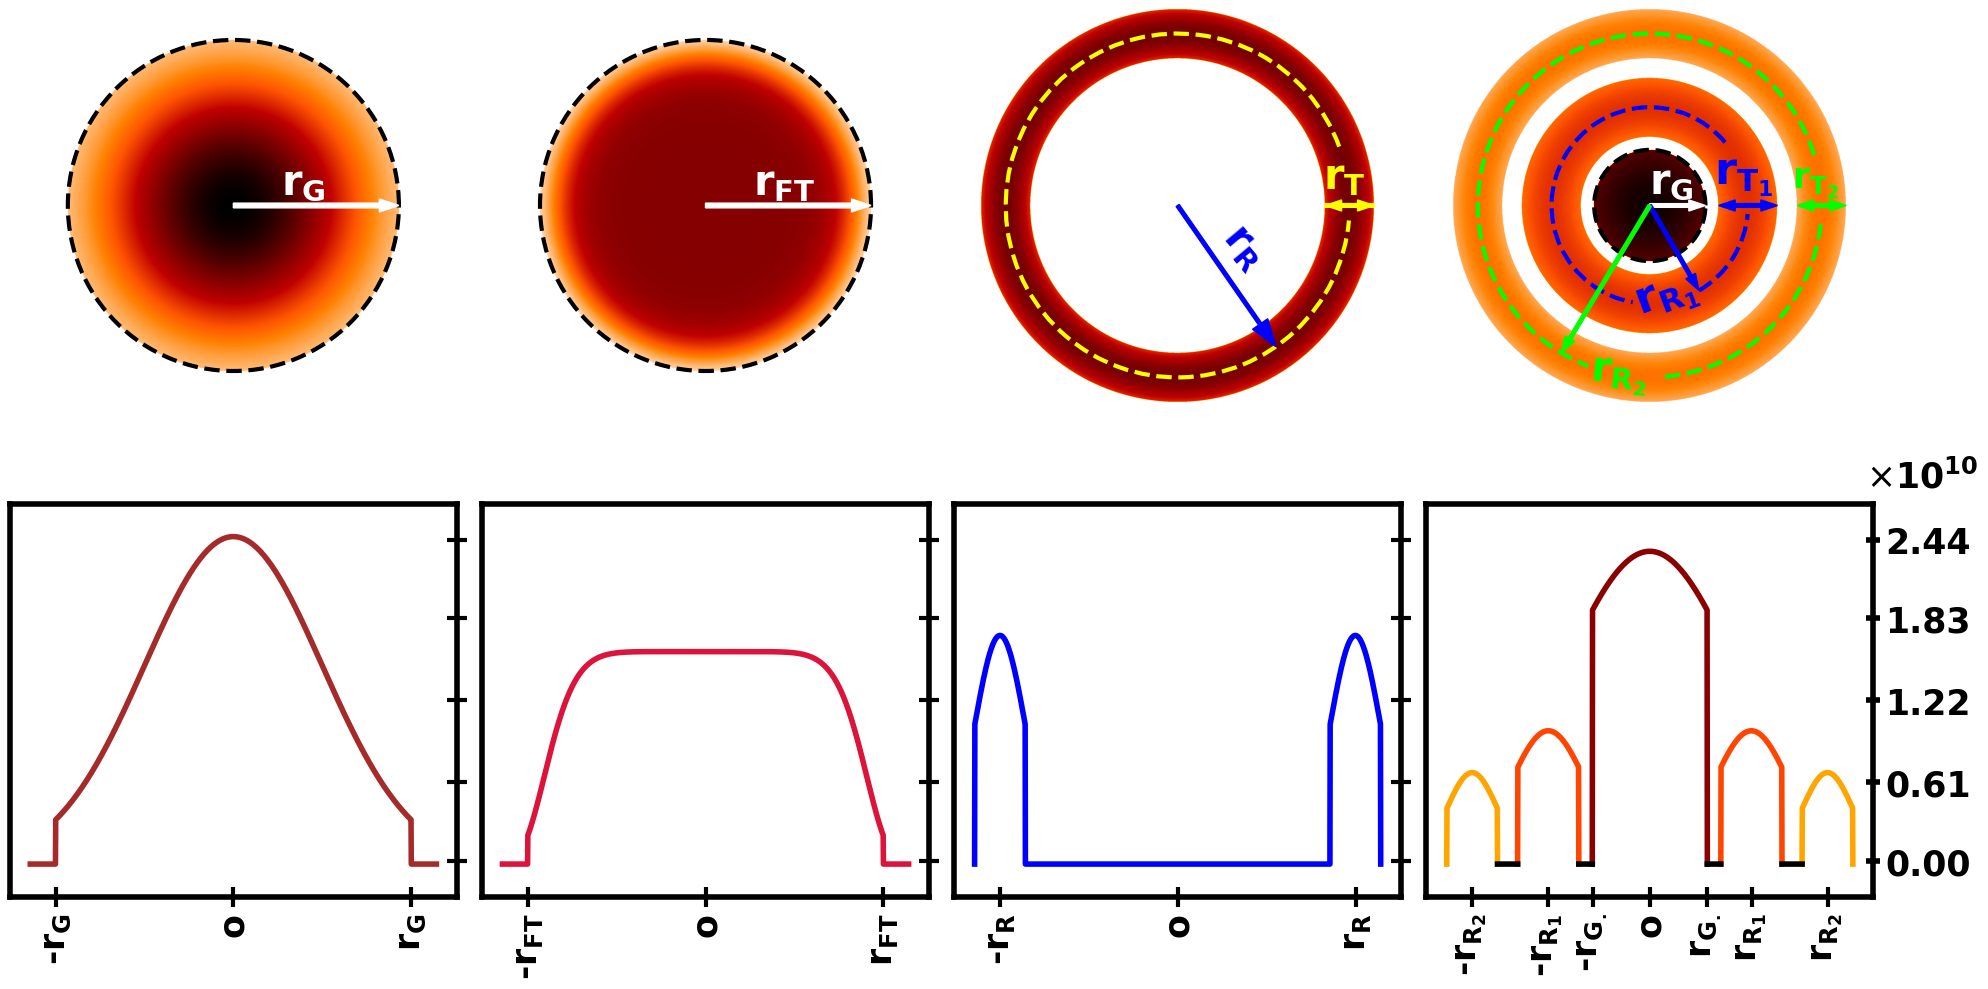

In [27]:
def zero_remover(array):
    # Create a boolean mask where the condition is true if an element is 0 and is adjacent to a non-zero element
    mask = (array == 0) & ((np.roll(array, 1) != 0) | (np.roll(array, -1) != 0))
    array[mask] = 1
    array[array == 0] = np.nan
    return array
    
fig, ((ax1, ax2, ax3, ax4),(ax5, ax6, ax7, ax8)) = plt.subplots(2,4, figsize=(20,10), frameon=False)
[ax.set_facecolor((0, 0, 0, 0)) for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]]
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.5)

cmap = plt.get_cmap(f'{cmaps[i]}')
cmap.set_under('white', alpha=0)
########### Gaussian ######
Q_G = FG * ((Ca * A * P * eta) / (np.pi * rG**2)) * np.exp(-Cb * ((r)**2 / (rG**2)))
hmap1 = ax1.imshow(Q_G, vmin=1, vmax=Q_G.max(), cmap=cmap, extent=extent, origin='upper')
circ_G = ax1.add_patch(patches.Arc((0, 0), 10*2*r_G, 10*2*r_G, angle=0.0, theta1=0.0, theta2=360, color='k', linestyle = '--', linewidth=3, fill=False))
ax1.scatter(0, 0, color='k', s=500, marker ='.')
ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax1.annotate(r'r$\mathbf{_{G}}$', xy=(200, 50), rotation=0, fontsize = 30, weight = 'bold', color='white',)
ax1.arrow(0, 0, 700, 0,  width = 20, color='white', length_includes_head=True, clip_on=False, head_width=55)
ax1.axis('equal')

############ Flat Top #####
Q_FT = FT*((Ca**(1/k)*k*P*eta*A)/(np.pi*rG**2*math.gamma(1/k)))*(np.exp(-Cb*(r**2/rG**2)**k))
hmap2 = ax2.imshow(Q_FT, vmin=1, vmax=Q_G.max(), cmap=cmap, extent=extent, origin='upper')
circ_FT = ax2.add_patch(patches.Arc((0, 0), 10*2*r_G, 10*2*r_G, angle=0.0, theta1=0.0, theta2=360, color='k', linestyle = '--', linewidth=3, fill=False))
# ax2.scatter(0, 0, color='k', s=100, marker ='.')
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.annotate(r'r$\mathbf{_{FT}}$', xy=(200, 50), rotation=0, fontsize = 30, weight = 'bold', color='white',)
ax2.arrow(0, 0, 700, 0,  width = 20, color='white', length_includes_head=True, clip_on=False, head_width=55)
ax2.axis('equal')

# ########## Ring ########
Y = np.exp(-rR**2 / (2 * (rT/2)**2)) + (rR / (rT/2)) * (np.pi / 2)**0.5 * erfc(-rR / ((rT/2) * 2**0.5))
Q_R = FR * ((Ca * A * P * eta) / (np.pi * rT**2 * Y)) * np.exp(-Cb * ((r - rR)**2 / (rT**2)))
hmap2 = ax3.imshow(Q_R, vmin=1, vmax=Q_G.max(), cmap=cmap, extent=extent, origin='upper')
circ_R = ax3.add_patch(patches.Arc((0, 0), 10*2*r_R, 10*2*r_R, angle=20.0, theta1=0.0, theta2=335, color='yellow', linestyle = '--', linewidth=3, fill=False))
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax3.annotate(r'r$\mathbf{_{R}}$', xy=(150, -250), rotation=-50, fontsize = 30, weight = 'bold', color='blue',)
ax3.annotate(r'r$\mathbf{_{T}}$', xy=(590, 70), rotation=0, fontsize = 30, weight = 'bold', color='yellow')
ax3.arrow(0, 0, 400, -575,  width = 15, color='blue', length_includes_head=True, clip_on=False, head_width=75)
ax3.arrow(600, 0, 200, 0,  width = 15, color='yellow', length_includes_head=True, clip_on=False, head_width=45)
ax3.arrow(800, 0, -200, 0,  width = 15, color='yellow', length_includes_head=True, clip_on=False, head_width=45)
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# ############# Bessel ########
Y1 = np.exp(-rR1**2 / (2 * (rT1/2)**2)) + (rR1 / (rT1/2)) * (np.pi / 2)**0.5 * erfc(-rR1 / ((rT1/2) * 2**0.5))
Y2 = np.exp(-rR2**2 / (2 * (rT2/2)**2)) + (rR2 / (rT2/2)) * (np.pi / 2)**0.5 * erfc(-rR2 / ((rT2/2) * 2**0.5))
Q_G0  = F0 * ((Ca * A * P * a0 * eta) / (np.pi * rBG**2)) * np.exp(-Cb * ((r)**2 / (rG**2)))
Q_R1 = F1 * ((Ca * A * P * a1 * eta) / (np.pi * rT1**2 * Y1)) * np.exp(-Cb * ((r - rR1)**2 / (rT1**2)))
Q_R2 = F2 * ((Ca * A * P * a2 * eta) / (np.pi * rT2**2 * Y2)) * np.exp(-Cb * ((r - rR2)**2 / (rT2**2)))
Q_B = Q_G0 + Q_R1 + Q_R2
hmap3 = ax4.imshow(Q_B, vmin=1, vmax=Q_G.max(), cmap=cmap, extent=extent, origin='upper')
circ_G = ax4.add_patch(patches.Arc((0, 0), 10*2*r_BG, 10*2*r_BG, angle=0, theta1=0.0, theta2=360, color='k', linestyle = '--', linewidth=3, fill=False))  
circ_R1a = ax4.add_patch(patches.Arc((0, 0), 10*2*r_R1, 10*2*r_R1, angle=40, theta1=0.0, theta2=220, color='blue', linestyle = '--', linewidth=3, fill=False))
circ_R1b = ax4.add_patch(patches.Arc((0, 0), 10*2*r_R1, 10*2*r_R1, angle=300, theta1=0.0, theta2=55, color='blue', linestyle = '--', linewidth=3, fill=False))
circ_R2a = ax4.add_patch(patches.Arc((0, 0), 10*2*r_R2, 10*2*r_R2, angle=17, theta1=0.0, theta2=232, color='lime', linestyle = '--', linewidth=3, fill=False))
circ_R2b = ax4.add_patch(patches.Arc((0, 0), 10*2*r_R2, 10*2*r_R2, angle=275, theta1=0.0, theta2=80, color='lime', linestyle = '--', linewidth=3, fill=False))
ax4.annotate(r'r$\mathbf{_G}$', xy=(-5, 50), rotation=0, fontsize = 30, weight = 'bold', color='white')
ax4.annotate(r'r$\mathbf{_{R_1}}$', xy=(-80, -440), rotation=20, fontsize = 32, weight = 'bold', color='blue',)
ax4.annotate(r'r$\mathbf{_{T_1}}$', xy=(260, 90), rotation=0, fontsize = 32, weight = 'bold', color='blue')
ax4.annotate(r'r$\mathbf{_{R_2}}$', xy=(-250, -730), rotation=-5, fontsize = 30, weight = 'bold', color='lime')
ax4.annotate(r'r$\mathbf{_{T_2}}$', xy=(580, 70), rotation=0, fontsize = 25, weight = 'bold', color='lime')

ax4.arrow(0, 0, 10*r_BG, 0,  width = 15, color='white', length_includes_head=True, clip_on=False, head_width=45)
ax4.arrow(0, 0, 200, -346,  width = 15, color='blue', length_includes_head=True, clip_on=False, head_width=45)
ax4.arrow(0, 0, -360, -600,  width = 15, color='lime', length_includes_head=True, clip_on=False, head_width=45)
ax4.arrow(300, 0, 220, 0,  width = 15, color='blue', length_includes_head=True, clip_on=False, head_width=45)
ax4.arrow(500, 0, -220, 0,  width = 15, color='blue', length_includes_head=True, clip_on=False, head_width=45)
ax4.arrow(620, 0, 180, 0,  width = 15, color='lime', length_includes_head=True, clip_on=False, head_width=45)
ax4.arrow(780, 0, -180, 0,  width = 15, color='lime', length_includes_head=True, clip_on=False, head_width=45)
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

ax5.plot(Q_G[800,:], linewidth=4, linestyle='-', color='brown')
ax5.set_ylim(-0.1*Q_G.max(), 1.1*Q_G.max())
ax5.tick_params(axis='both',  direction='inout', length=15, width=3, color='k', labelcolor='black', labelsize=65, bottom=True, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax5.set_yticks([np.max(Q_G)*0.01, (np.max(Q_G))/4, (np.max(Q_G))/2, (np.max(Q_G))*3/4, np.max(Q_G)*0.99], labels=[f'',f'', f'',f'', f''], size=25, color='k', rotation=0,  weight='bold', )
ax5.set_xticks([800-700, 800, 800+700], labels=[r'-r$\mathbf{_{G}}$', r'o', r'r$\mathbf{_{G}}$', ], size=25, color='k', rotation=90, weight='bold')
ax5.yaxis.tick_right()

ax6.plot(Q_FT[800,:], linewidth=4, linestyle='-', color='crimson')
ax6.set_ylim(-0.1*Q_G.max(), 1.1*Q_G.max())
ax6.tick_params(axis='both',  direction='inout', length=15, width=3, color='k', labelcolor='black', labelsize=65, bottom=True, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax6.set_yticks([np.max(Q_G)*0.01, (np.max(Q_G))/4, (np.max(Q_G))/2, (np.max(Q_G))*3/4, np.max(Q_G)*0.99], labels=[f'',f'', f'',f'', f''], size=25, color='k', rotation=0,  weight='bold', )
ax6.set_xticks([800-700, 800, 800+700], labels=[r'-r$\mathbf{_{FT}}$', r'o', r'r$\mathbf{_{FT}}$', ], size=25, color='k', rotation=90, weight='bold')
ax6.yaxis.tick_right()

ax7.plot(Q_R[800,:], linewidth=4, linestyle='-', color='blue')
ax7.set_ylim(-0.1*Q_G.max(), 1.1*Q_G.max())
ax7.tick_params(axis='both',  direction='inout', length=15, width=3, color='k', labelcolor='black', labelsize=65, bottom=True, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax7.set_xticks([800-700, 800, 800+700], labels=[r'-r$\mathbf{_{R}}$', r'o', r'r$\mathbf{_{R}}$', ], size=25, color='k', rotation=90, weight='bold')
ax7.set_yticks([np.max(Q_G)*0.01, (np.max(Q_G))/4, (np.max(Q_G))/2, (np.max(Q_G))*3/4, np.max(Q_G)*0.99], labels=[f'',f'', f'',f'', f''], size=25, color='k', rotation=0,  weight='bold', )
ax7.yaxis.tick_right()


Q_G0, Q_R1, Q_R2 = zero_remover(Q_G0), zero_remover(Q_R1), zero_remover(Q_R2) 
Q_B[Q_B != 0] = np.nan
ax8.plot(Q_G0[800,:], linewidth=4, linestyle='-', color='darkred')
ax8.plot(Q_R1[800,:], linewidth=4, linestyle='-', color='orangered')
ax8.plot(Q_R2[800,:], linewidth=4, linestyle='-', color='orange')
ax8.plot(Q_B[800,:], linewidth=4, linestyle='-', color='k')
ax8.set_ylim(-0.1*Q_G.max(), 1.1*Q_G.max())
ax8.set_yticks([np.max(Q_G)*0.01, (np.max(Q_G))/4, (np.max(Q_G))/2, (np.max(Q_G))*3/4, np.max(Q_G)*0.99], labels=[f'{np.min(Q_G)/1e10:.2f}',f'{(np.max(Q_G)/4)/1e10:.2f}',  f'{(np.max(Q_G)/2)/1e10:.2f}',f'{(np.max(Q_G)*3/4)/1e10:.2f}',  f'{np.max(Q_G)/1e10:.2f}'], size=25, color='k', rotation=0,  weight='bold', )
ax8.text(400,2.8e10, s=r'$\times$10$\mathbf{^{10}}$', size=75, weight='bold', color='none')
ax8.text(1650,2.8e10, s=r'$\times$10$\mathbf{^{10}}$', size=25, weight='bold', color='k')
ax8.set_xticks([800-700, 800-400, 800-226, 800, 800+226, 800+400, 800+700], labels=[r'-r$\mathbf{_{R_2}}$', r'-r$\mathbf{_{R_1}}$', r'-r$\mathbf{_{G_.}}$', 'o', r'r$\mathbf{_{G_.}}$', r'r$\mathbf{_{R_1}}$', r'r$\mathbf{_{R_2}}$', ], size=25, color='k', rotation=90, weight='bold')
# text = Text(x=1.01, y=0.12, text=r'$\mathbf{\leftarrow}$Q [W/m$\mathbf{^2}$]$\mathbf{\rightarrow}$', fontsize=40, color='k', rotation=90, weight='bold')
# fig.add_artist(text)
ax8.tick_params(axis='y', which='both', direction='inout', length=10, width=4, color='k')
ax8.tick_params(axis='x', which='both', direction='inout', length=15, width=3, color='k')
ax8.yaxis.tick_right()

for ax in [ax1, ax2, ax3, ax4]: ax.spines[:].set_linewidth(0)
for ax in [ax5, ax6, ax7, ax8]: ax.spines[:].set_linewidth(4)

######### Color Bar
# # ax9 = fig.add_axes([0.94, 0.54, 0.04, 0.3])  ## without tight layout
# ax9 = fig.add_axes([0.98, 0.62, 0.04, 0.3]) 
# ax9.tick_params(axis='both', labelcolor='black', labelsize=20, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
# cbar = fig.colorbar(hmap1, cax=ax9, orientation='vertical')
# cbar.ax.tick_params(labelsize=25, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\leftarrow}$Q [W/m$\mathbf{^2}$]$\mathbf{\rightarrow}$', color='k',  labelpad=-165, fontsize=30, rotation=90, weight='bold')
# cbar.set_ticks([np.max(Q_G)*0.01, (np.max(Q_G))/4, (np.max(Q_G))/2, (np.max(Q_G))*3/4, np.max(Q_G)*0.99], labels=[f'{np.min(Q_G)/1e10:.2f}',f'{(np.max(Q_G)/4)/1e10:.2f}',  f'{(np.max(Q_G)/2)/1e10:.2f}',f'{(np.max(Q_G)*3/4)/1e10:.2f}',  f'{np.max(Q_G)/1e10:.2f}'], weight='bold') 
# cbar.ax.set_title(r'$\mathbf{\times 10 ^{10}}$', fontsize=20, color='k', weight='bold', pad=5)
# ax9.spines[:].set_linewidth(4)


plt.tight_layout()
    
# plt.savefig('../../figures/laser_beams_2D_Side_Top.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/laser_beams_2D_Side_Top.jpg',bbox_inches='tight',)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/laser_beams_2D_Side_Top.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/laser_beams_2D_Side_Top.jpg',bbox_inches='tight',)

plt.show()

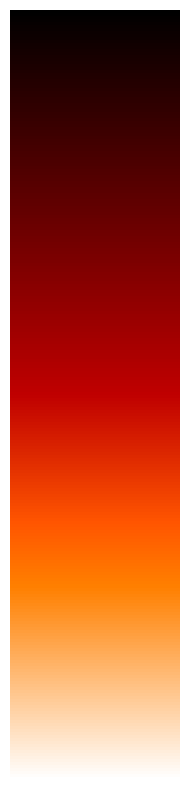

In [29]:
fig, ax2 = plt.subplots(1,1, figsize=(2,8), frameon=False)
ax2.set_facecolor((0, 0, 0, 0))
ax2.tick_params(axis='both', labelcolor='black', labelsize=20, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
cbar = fig.colorbar(hmap1, cax=ax2, orientation='vertical')
cbar.ax.tick_params(labelsize=35, direction='in', length=0) 
# cbar.set_label(r'$\mathbf{\longleftarrow}$   Q [W/m$\mathbf{^2}$]  $\mathbf{\longrightarrow}$', color='white',  labelpad=-120, fontsize=40, rotation=90, weight='bold')
cbar.set_ticks([np.max(Q_GHS)*0.01, (np.max(Q_GHS))/4, (np.max(Q_GHS))/2, (np.max(Q_GHS))*3/4, np.max(Q_GHS)*0.99], labels=[f'{np.min(Q_GHS)/1e10:.2f}',f'{(np.max(Q_GHS)/4)/1e10:.2f}',  f'{(np.max(Q_GHS)/2)/1e10:.2f}',f'{(np.max(Q_GHS)*3/4)/1e10:.2f}',  f'{np.max(Q_GHS)/1e10:.2f}'], weight='bold') 
cbar.set_ticks([np.max(Q_GHS)*0.01, (np.max(Q_GHS))/4, (np.max(Q_GHS))/2, (np.max(Q_GHS))*3/4, np.max(Q_GHS)*0.99], labels=['','','','',''], weight='bold') 
# cbar.ax.set_title(r'$\mathbf{\times 10 ^{10}}$', fontsize=35, color='k', weight='bold', pad=15)
ax2.spines[:].set_linewidth(0)
plt.tight_layout()
# plt.savefig('../../figures/Colorbar_2D.png',bbox_inches='tight', dpi=800)
# plt.savefig('../../figures/jpg/Colorbar_2D.jpg',bbox_inches='tight',)
plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/Colorbar_2D.png',bbox_inches='tight', dpi=800)
plt.savefig('../../../../0_GitHub_hostings/FreeEnergy_Benchmark_Model/2_Post_Processing/figures/jpg/Colorbar_2D.jpg',bbox_inches='tight',)
plt.show()

# Other

In [457]:

P = 250
Ca=2
Cb=2
eta=0.75
r_G=70
rG=r_G
A = 8.5*1e7
factor = 1.0e-4

x = np.linspace(-200, 200, 100)
y = np.linspace(-200, 200, 100)
x, y = np.meshgrid(x, y)

r = (x**2 + y**2)**0.5
F = np.where(r_G - r < 0, 0, 1) * factor
z = F*((Ca*A*P*eta)/(np.pi*rG**2))*(np.exp(-Cb*(r**2/rG**2)))

# View it.
from mayavi import mlab
s = mlab.mesh(x, y, z,)# extent=[-200e-6, 200e-6, -200e-6, 200e-6, 0, 2.5e14] )
mlab.show()

In [ ]:
extent: [xmin, xmax, ymin, ymax, zmin, zmax]